## DEEP LEARNING CNN FOR FASHION MNIST DATASET
---
* Using PyTorch
* Reimplementation of : SOURCE{https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/}

In [1]:
import os
import sys

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms

from models import BaselineCNN, LeNet5, ResNetMini, DenseNetTiny, MobileNetLite, ViTTiny
from utils import train_eval_report
from utils import visualise_fashion_mnist
from utils.globals import BATCH_SIZE, LEARNING_RATE
from utils.globals import device, early_stopper, loss_fn

In [2]:
# import dataset - fashion MNIST

# Specify transforms
transform = transforms.Compose([
    # transforms.Resize(256),         # Up scale image to 256 x 256  NOTE WAY TOO COMPUTATIONALLY INTENSIVE
    transforms.ToTensor()           # Convert from image.PIL to tensors
])
# NOTE Images are left as 1 channel grayscale images for now!

download = not os.path.exists('./data/FashionMNIST')
train_dataset = torchvision.datasets.FashionMNIST(root='./data/', train=True, download=download, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data/', train=False, download=download, transform=transform)

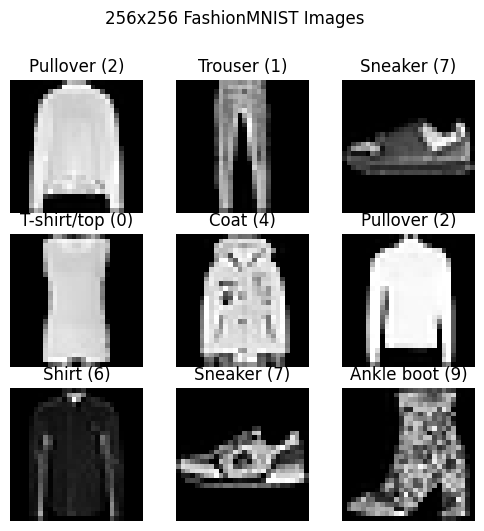

In [3]:
# test sample
visualise_fashion_mnist(train_dataset)

In [4]:
# Setting up data loaders
train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

# Check that the dataloader works
images, labels = next(iter(train_dataloader))
sample_image, sample_label = images[0], labels[1]
sample_image.shape, sample_label

(torch.Size([1, 28, 28]), tensor(1))

In [5]:
lenet5 = LeNet5()
optimizer = torch.optim.Adam(params=lenet5.parameters(), lr=LEARNING_RATE)

report_lenet5 = train_eval_report(
    model=lenet5,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    early_stopper=None,
    device=device,
)

report_lenet5

Epoch   1 (Train/Test) Loss: 0.547114/0.441744. Acc: 0.8007/0.8350. Rcll: tensor([0.6450, 0.9580, 0.7590, 0.8140, 0.8120, 0.9550, 0.5940, 0.9460, 0.9450,
        0.9210])
Epoch   2 (Train/Test) Loss: 0.381379/0.387117. Acc: 0.8603/0.8552. Rcll: tensor([0.7890, 0.9650, 0.7490, 0.7920, 0.8050, 0.9250, 0.6550, 0.9660, 0.9680,
        0.9360])
Epoch   3 (Train/Test) Loss: 0.340122/0.361515. Acc: 0.8761/0.8704. Rcll: tensor([0.8590, 0.9660, 0.8140, 0.8770, 0.7670, 0.9250, 0.6140, 0.9630, 0.9640,
        0.9560])
Epoch   4 (Train/Test) Loss: 0.314449/0.339499. Acc: 0.8840/0.8754. Rcll: tensor([0.8340, 0.9640, 0.7560, 0.9040, 0.8420, 0.9650, 0.6270, 0.9330, 0.9730,
        0.9560])
Epoch   5 (Train/Test) Loss: 0.294266/0.329680. Acc: 0.8917/0.8833. Rcll: tensor([0.8340, 0.9680, 0.7620, 0.8970, 0.8750, 0.9590, 0.6650, 0.9510, 0.9670,
        0.9540])


KeyboardInterrupt: 

In [ ]:
# resnet_mini = ResNetMini(base_channels=4)  # Drastically lowered for computational efficiency while developing
# optimizer = torch.optim.Adam(params=resnet_mini.parameters(), lr=LEARNING_RATE)

# report_resnet = train_eval_report(
#     model=resnet_mini,
#     train_dataloader=train_dataloader,
#     test_dataloader=test_dataloader,
#     optimizer=optimizer,
#     loss_fn=loss_fn,
#     early_stopper=None,
#     device=device,
# )

# report_resnet

In [ ]:
# densenet_tiny = DenseNetTiny()
# optimizer = torch.optim.Adam(params=densenet_tiny.parameters(), lr=LEARNING_RATE)

# report_densenet = train_eval_report(
#     model=densenet_tiny,
#     train_dataloader=train_dataloader,
#     test_dataloader=test_dataloader,
#     optimizer=optimizer,
#     loss_fn=loss_fn,
#     early_stopper=None,
#     device=device,
# )

# report_densenet

In [ ]:
# mobilenet_lite = MobileNetLite()
# optimizer = torch.optim.Adam(params=mobilenet_lite.parameters(), lr=LEARNING_RATE)

# report_mobilenet = train_eval_report(
#     model=mobilenet_lite,
#     train_dataloader=train_dataloader,
#     test_dataloader=test_dataloader,
#     optimizer=optimizer,
#     loss_fn=loss_fn,
#     early_stopper=None,
#     device=device,
# )

# report_mobilenet

In [ ]:
# vit_tiny = ViTTiny()
# optimizer = torch.optim.Adam(params=vit_tiny.parameters(), lr=LEARNING_RATE)

# report_vit = train_eval_report(
#     model=vit_tiny,
#     train_dataloader=train_dataloader,
#     test_dataloader=test_dataloader,
#     optimizer=optimizer,
#     loss_fn=loss_fn,
#     early_stopper=None,
#     device=device,
# )

# report_vit